# Objetivo1 


$resize$ $imagenes$

In [2]:
import cv2
import glob
import skimage


#Librerias contornos 
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from skimage import data, io
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu 


In [3]:
#se obtiene lista de imagenes
images00000 = [cv2.imread(file,0) for file in glob.glob("Dataset_traffic_sign/00000/*.png")]
images00000_mod = [] 
for im in images00000:
    #se aplica el resize
    images00000_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

#se muestran las imagenes
for im in images00000_mod:
    cv2.imshow('Resized Image', im)
    print(im.shape)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


In [ ]:
for im in images00000:
    print(im.shape)

Bordes 

In [ ]:
rango = len(images00000)

In [ ]:

for i in range(rango):
    #calculating horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(images00000[i])
    #calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(images00000[i])
    print(edges_prewitt_vertical)
    print(edges_prewitt_vertical.shape)
    print(type(edges_prewitt_vertical))
    print("---------------------")
    cv2.imshow('ventana',edges_prewitt_vertical)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
def convertirArray(imagen):
    return imagen.reshape(1,-1)

In [ ]:
def mostrarImagenes(lista):
    for i in range(len(lista)):
        print(lista[i])

Distinto a metodo Otsu

In [ ]:
feauturesList1  = []

for i in range(rango):
    gray = cv2.medianBlur(images00000_mod[i], 5)
    dst2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    feauturesList1.append(convertirArray(dst2))
    cv2.imshow('umbral adaptable', dst2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
mostrarImagenes(feauturesList1)

Otsu

In [ ]:
import skimage
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
feauturesList2  = []


for i in range(rango):    
    threshold_value = threshold_otsu(images00000_mod[i])  

    camera_threholded = images00000_mod[i] > threshold_value  

    # Show the original image
    #io.imshow(images00000_mod[i])
    #plt.show()

    # Show the thresholded image
    io.imshow(camera_threholded)
    plt.show()
    
    feauturesList2.append(convertirArray(camera_threholded*255))
    
    print("----------------------------------------------")

In [ ]:
mostrarImagenes(feauturesList2)

In [ ]:
from skimage.feature import hog
from skimage import data, exposure


fd, hog_image = hog(images00000_mod[0], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(images00000_mod[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
from cv2 import 

In [ ]:
from sklearn import svm

sd = cv2.FeatureDetector_create("SURF")
keypoints = sd.detect(hog_image_rescaled.flatten())
kp,des = surf.compute(hog_image_rescaled.flatten(), keypoints)
model = svm.SVC()
model.fit(des,['type1'])

$Sift$

In [4]:
images00000_mod[0]

array([[59, 59, 63, ..., 55, 50, 51],
       [61, 61, 60, ..., 53, 51, 52],
       [61, 61, 61, ..., 46, 53, 58],
       ...,
       [38, 38, 42, ..., 15, 17, 19],
       [39, 42, 45, ..., 15, 15, 17],
       [35, 33, 31, ..., 15, 19, 21]], dtype=uint8)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(images00000_mod[0],None)    
#quizas falta un tercer parametro:  imagen original
img=cv2.drawKeypoints(images00000_mod[0],kp, images00000_mod[0], flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite('sift_keypoints.jpg',img)

In [30]:
des.shape

(56, 128)

In [31]:
cv2.imshow('ventana', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

$Surf$

In short, SURF adds a lot of features to improve the speed in every step. Analysis shows it is 3 times faster than SIFT while performance is comparable to SIFT. SURF is good at handling images with blurring and rotation, but not good at handling viewpoint change and illumination change.

In [32]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.xfeatures2d.SURF_create(400)

kp, des = surf.detectAndCompute(images00000_mod[0],None)

len(kp)

53

In [39]:
des.shape

(53, 64)

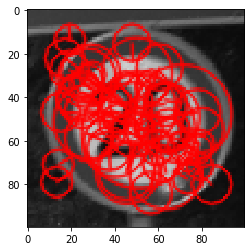

(<matplotlib.image.AxesImage at 0x21f2f131948>, None)

In [36]:
img2 = cv2.drawKeypoints(images00000_mod[0],kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

Fast

it is several times faster than other existing corner detectors.

But it is not robust to high levels of noise. It is dependent on a threshold.

In [63]:
# Initiate FAST object with default values
                                              #COMO OBTENER DES??????????
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(images00000_mod[0],None)
img2 = cv2.drawKeypoints(images00000_mod[0], kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv2.imwrite('fast_true.png',img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
cv2.imwrite('fast_false.png',img3)




Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 195
Total Keypoints without nonmaxSuppression: 1275


True

In [62]:
cv2.imshow('ventana1', img2) #no realiza supresion de maximos
cv2.imshow('ventana2', img3)

cv2.waitKey(0)
cv2.destroyAllWindows()